# Data prep

In [1]:
# from torchvision import datasets
# flowers102 = datasets.Flowers102("./dataset", download=True)

In [2]:
# # img_lables
# import scipy.io as sio
# img_lable = sio.loadmat("./dataset/flowers-102/imagelabels.mat")
# img_lable["labels"][0].shape

(8189,)

In [4]:
# import pandas as pd
# class_names = pd.read_csv("./oxford_flower_102_name.csv")
# class_name_list = []
# for cn in class_names["Name"]:
#     class_name_list.append(cn)

# print(class_name_list)

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia', 'cau

In [18]:
# # img_lables
# import scipy.io as sio
# img_sid = sio.loadmat("./dataset/flowers-102/setid.mat")
# img_sid

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

In [4]:
# lable_dict = {}
# for j in img_lable["labels"][0]:
#     if j in lable_dict:
#         lable_dict[j]+=1
#     else:
#         lable_dict[j]=1

In [5]:
# lable_dict

{77: 251,
 73: 194,
 88: 154,
 89: 184,
 81: 166,
 46: 196,
 74: 171,
 51: 258,
 44: 93,
 82: 112,
 83: 131,
 78: 137,
 80: 105,
 75: 120,
 41: 127,
 43: 130,
 76: 107,
 84: 86,
 58: 114,
 56: 109,
 86: 58,
 60: 109,
 92: 66,
 11: 87,
 65: 102,
 8: 85,
 23: 91,
 30: 85,
 72: 96,
 53: 93,
 37: 108,
 17: 85,
 12: 87,
 29: 78,
 52: 85,
 18: 82,
 36: 75,
 90: 82,
 71: 78,
 40: 67,
 48: 71,
 55: 71,
 85: 63,
 91: 76,
 20: 56,
 47: 67,
 59: 67,
 2: 60,
 5: 65,
 28: 66,
 70: 62,
 22: 59,
 54: 61,
 87: 63,
 66: 61,
 32: 45,
 4: 56,
 42: 59,
 13: 49,
 38: 56,
 63: 54,
 68: 54,
 69: 54,
 93: 46,
 14: 48,
 64: 52,
 19: 49,
 49: 49,
 61: 50,
 50: 92,
 15: 49,
 9: 46,
 33: 46,
 26: 41,
 25: 41,
 3: 40,
 16: 41,
 79: 41,
 1: 40,
 21: 40,
 24: 42,
 27: 40,
 31: 52,
 34: 40,
 35: 43,
 39: 41,
 67: 42,
 10: 45,
 45: 40,
 6: 45,
 7: 40,
 57: 67,
 62: 55,
 94: 162,
 95: 128,
 96: 91,
 97: 66,
 98: 82,
 99: 63,
 100: 49,
 101: 58,
 102: 48}

In [6]:
# import numpy as np
# keys = list(lable_dict.keys())
# values = list(lable_dict.values())
# print(values)
# sorted_value_index = np.argsort(values)
# sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
# print(sorted_dict)


[251, 194, 154, 184, 166, 196, 171, 258, 93, 112, 131, 137, 105, 120, 127, 130, 107, 86, 114, 109, 58, 109, 66, 87, 102, 85, 91, 85, 96, 93, 108, 85, 87, 78, 85, 82, 75, 82, 78, 67, 71, 71, 63, 76, 56, 67, 67, 60, 65, 66, 62, 59, 61, 63, 61, 45, 56, 59, 49, 56, 54, 54, 54, 46, 48, 52, 49, 49, 50, 92, 49, 46, 46, 41, 41, 40, 41, 41, 40, 40, 42, 40, 52, 40, 43, 41, 42, 45, 40, 45, 40, 67, 55, 162, 128, 91, 66, 82, 63, 49, 58, 48]
{34: 40, 3: 40, 7: 40, 45: 40, 1: 40, 21: 40, 27: 40, 25: 41, 16: 41, 79: 41, 26: 41, 39: 41, 24: 42, 67: 42, 35: 43, 10: 45, 6: 45, 32: 45, 93: 46, 9: 46, 33: 46, 14: 48, 102: 48, 15: 49, 49: 49, 19: 49, 100: 49, 13: 49, 61: 50, 64: 52, 31: 52, 63: 54, 69: 54, 68: 54, 62: 55, 4: 56, 20: 56, 38: 56, 101: 58, 86: 58, 22: 59, 42: 59, 2: 60, 66: 61, 54: 61, 70: 62, 85: 63, 87: 63, 99: 63, 5: 65, 28: 66, 92: 66, 97: 66, 59: 67, 40: 67, 47: 67, 57: 67, 55: 71, 48: 71, 36: 75, 91: 76, 29: 78, 71: 78, 18: 82, 90: 82, 98: 82, 17: 85, 52: 85, 30: 85, 8: 85, 84: 86, 11: 8

In [7]:
# len(img_lable["labels"][0])

8189

In [8]:
# # data agrigation
# # crearing train and test
# import os, shutil
# BASE_IMG_FOLDER = "./dataset/flowers-102/jpg"
# BASE_DEST_FOLDER = "./dataset/flowers-102/data"
# os.makedirs(BASE_DEST_FOLDER, exist_ok=True)

# flower_imgs = sorted(os.listdir(BASE_IMG_FOLDER))

# for i in range(len(img_lable["labels"][0])):
#     flower_src = os.path.join(BASE_IMG_FOLDER, str(flower_imgs[i]))
#     flower_dest = os.path.join(BASE_DEST_FOLDER, str(img_lable["labels"][0][i]))
#     # print(flower_dest)
#     os.makedirs(flower_dest, exist_ok=True)
#     shutil.move(flower_src, flower_dest)

In [9]:
# # creating train and test
# import random
# BASE_DATA_FOLDER = "./dataset/flowers-102/data"
# BASE_TRAIN_DATA_FOLDER = "./dataset/flowers-102/train_data"
# TRAIN_FOLDER = os.path.join(BASE_TRAIN_DATA_FOLDER, "train")
# TEST_FOLDER = os.path.join(BASE_TRAIN_DATA_FOLDER, "test")

# os.makedirs(BASE_TRAIN_DATA_FOLDER, exist_ok=True)
# os.makedirs(TRAIN_FOLDER, exist_ok=True)
# os.makedirs(TEST_FOLDER, exist_ok=True)

# #1. Directly moving all data to train_data/train
# for mda in os.listdir(BASE_DATA_FOLDER):
#     shutil.move(os.path.join(BASE_DATA_FOLDER, mda), TRAIN_FOLDER)

# #2. Moving test_size % data to test folder
# test_size = 0.15
# for pf in os.listdir(TRAIN_FOLDER):
#     total_train_imgs = os.listdir(os.path.join(TRAIN_FOLDER, pf))
#     test_dest = os.path.join(TEST_FOLDER, pf)
#     os.makedirs(test_dest)
#     mov_list = []
#     for f in range(0, int(len(total_train_imgs) * test_size)):
#         rand_int=random.randint(0, len(total_train_imgs)-1)
#         while rand_int in mov_list:
#             rand_int=random.randint(0, len(total_train_imgs)-1)
#         mov_list.append(rand_int)
        
#         shutil.move(os.path.join(TRAIN_FOLDER, pf, total_train_imgs[rand_int]), test_dest)

# model train

In [10]:
import torch
from torch import nn
from torchvision import models
import os
from torchinfo import summary

#custom_modules
from Vision_Transformer.data_setup import createDataloader

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
eff_net_b0_weight = models.EfficientNet_B0_Weights.IMAGENET1K_V1
eff_net_transfromer = eff_net_b0_weight.transforms()
eff_net_transfromer

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [13]:
#datast
BASE_TRAIN_DATA_FOLDER = "./dataset/flowers-102/train_data"
datapath = BASE_TRAIN_DATA_FOLDER
train_dl, test_dl, _classes = createDataloader(train_path=os.path.join(datapath, "train"),
                                     test_path=os.path.join(datapath, "test"), 
                                     train_transform=eff_net_transfromer, 
                                     test_transform=eff_net_transfromer,
                                     BTACH_SIZE=32)

In [14]:
len(train_dl), len(test_dl), len(_classes), _classes

(219,
 38,
 102,
 ['1',
  '10',
  '100',
  '101',
  '102',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '4',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '5',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '6',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '7',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '8',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '9',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99'])

In [15]:
eff_net_model = models.efficientnet_b0(weights=eff_net_b0_weight)

In [16]:
# pause train for non classif layer
for p in eff_net_model.parameters():
    p.requires_grad = False

In [17]:
#swaping outlayer
eff_net_model.classifier = nn.Sequential(
    nn.Dropout(0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(_classes), bias=True)
)

In [18]:
summary(model=eff_net_model, input_size=(1,3,224,224),  col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 102]             --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [20]:
eff_net_model = eff_net_model.to(device=device)

In [21]:
def acc_fn(y_preds, y):
    return(torch.eq(y_preds, y).sum() / len(y))

In [22]:
# traning on own data
loss = nn.CrossEntropyLoss().to(device=device)
optim = torch.optim.Adam(params=eff_net_model.parameters())
from Vision_Transformer.utils import trainit

trainit(eff_net_model, train_dl, test_dl, loss, optim, 10, True, device=device)

# for e in range(0, 10):
# 	eff_net_model.train()
# 	total_loss = 0
# 	total_acc = 0
# 	for img, lable in train_dl:
# 		img = img.to(device)
# 		lable = lable.to(device)
# 		y_preds = eff_net_model(img)
# 		tr_loss = loss(y_preds, lable)
# 		total_loss+=tr_loss.item()
# 		total_acc+=acc_fn(torch.argmax(y_preds, dim=1), lable).item()
# 		optim.zero_grad()
# 		tr_loss.backward()
# 		optim.step()
# 	print(total_loss/len(train_dl), total_acc/len(train_dl))
        

  0%|          | 0/10 [00:00<?, ?it/s]

Train: Loss - 2.269853091131062 | Accuracy - 0.6182933449745178


 10%|█         | 1/10 [00:43<06:30, 43.41s/it]

Test: Loss - 1.035602331161499 | Accuracy - 0.8725329041481018
Train: Loss - 0.7441117895520442 | Accuracy - 0.9028864502906799


 20%|██        | 2/10 [01:39<06:46, 50.77s/it]

Test: Loss - 0.6183934211730957 | Accuracy - 0.9095394611358643
Train: Loss - 0.4648882897749339 | Accuracy - 0.9364603161811829


 30%|███       | 3/10 [02:24<05:37, 48.28s/it]

Test: Loss - 0.4381435215473175 | Accuracy - 0.9268091917037964
Train: Loss - 0.3289091916389117 | Accuracy - 0.9514431953430176


 40%|████      | 4/10 [03:08<04:38, 46.49s/it]

Test: Loss - 0.392455518245697 | Accuracy - 0.9243420958518982
Train: Loss - 0.2668940345310185 | Accuracy - 0.9620433449745178


 50%|█████     | 5/10 [03:51<03:46, 45.37s/it]

Test: Loss - 0.3417259156703949 | Accuracy - 0.9284539818763733
Train: Loss - 0.21383723327422252 | Accuracy - 0.9701564908027649


 60%|██████    | 6/10 [04:35<02:58, 44.73s/it]

Test: Loss - 0.3243294060230255 | Accuracy - 0.9333881735801697
Train: Loss - 0.17261049454206745 | Accuracy - 0.9773116111755371


 70%|███████   | 7/10 [05:18<02:13, 44.33s/it]

Test: Loss - 0.2996731102466583 | Accuracy - 0.9358552694320679
Train: Loss - 0.15259095322187632 | Accuracy - 0.9788812398910522


 80%|████████  | 8/10 [06:02<01:28, 44.28s/it]

Test: Loss - 0.27854806184768677 | Accuracy - 0.9358552694320679
Train: Loss - 0.1335402434292041 | Accuracy - 0.9835697412490845


 90%|█████████ | 9/10 [06:46<00:44, 44.16s/it]

Test: Loss - 0.3121233284473419 | Accuracy - 0.9144737124443054
Train: Loss - 0.12577136965749197 | Accuracy - 0.9790034890174866


100%|██████████| 10/10 [07:30<00:00, 45.07s/it]

Test: Loss - 0.2665843069553375 | Accuracy - 0.9391447305679321


In [23]:
# saving this model
torch.save(eff_net_model.state_dict(), "eff-net-91.pth")

# Using This new save model

In [8]:
import torch
from torch import nn
from torchvision import models
import os
from torchinfo import summary

#custom_modules
from Vision_Transformer.data_setup import createDataloader

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
new_eff_net_b0_weight = models.EfficientNet_B0_Weights.IMAGENET1K_V1
new_eff_net_transfromer = new_eff_net_b0_weight.transforms() 

In [11]:
#datast
BASE_TRAIN_DATA_FOLDER = "./dataset/flowers-102/train_data"
datapath = BASE_TRAIN_DATA_FOLDER
train_dl, test_dl, _classes = createDataloader(train_path=os.path.join(datapath, "train"),
                                     test_path=os.path.join(datapath, "test"), 
                                     train_transform=new_eff_net_transfromer, 
                                     test_transform=new_eff_net_transfromer,
                                     BTACH_SIZE=32)

In [12]:
new_eff_model = models.efficientnet_b0(weights=new_eff_net_b0_weight)
new_eff_model.classifier = nn.Sequential(
    nn.Dropout(0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(_classes), bias=True)
)

In [17]:
new_eff_model.load_state_dict(torch.load("eff-net-91.pth"))
new_eff_model = new_eff_model.to(device=device)

/tmp/ipykernel_20003/1551619941.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_eff_model.load_state_dict(torch.load("eff-net-91.pth"))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..2.4308496].


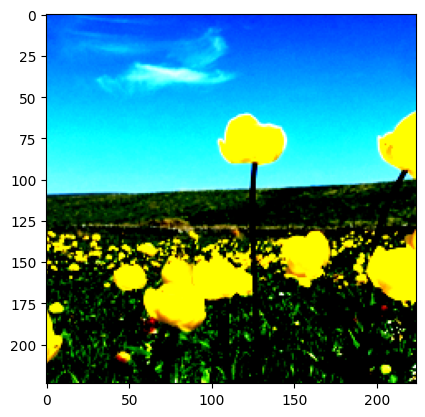

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
# import requests
# with open("pizza.jpg", "wb") as f:
#     img = requests.get("https://veenaazmanov.com/wp-content/uploads/2020/07/Mushroom-Pizza-Recipe4.jpg")
#     f.write(img.content)

img_path = "./Globeflower Ashes Pasture Bernie Higgins.jpg"
# img_path = "./steak.jpg"
img = Image.open(img_path)
img = new_eff_net_transfromer(img).unsqueeze(0)
plt.imshow(img[0].permute(1,2,0))


In [26]:
with torch.inference_mode():
    new_eff_model.eval()
    y_pred = new_eff_model(img.to(device))

In [27]:
class_name_list[int(_classes[torch.argmax(y_pred)])-1], _classes[torch.argmax(y_pred)]

('primula', '53')